In [61]:
import numpy as np

In [62]:
def load_mnist():
    from tensorflow.keras.datasets import mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(-1, 28*28).astype(np.float32) / 255.0
    X_test = X_test.reshape(-1, 28*28).astype(np.float32) / 255.0
    return X_train, y_train, X_test, y_test

In [63]:
X_train, y_train, X_test, y_test = load_mnist()

In [64]:
data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [65]:
#one-hot encode labels
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

In [66]:
def relu(z):
    return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [67]:
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-10), axis=1))  # Add small epsilon to avoid log(0)

In [68]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros(output_size)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = softmax(self.z2)
        return self.a2

    def backward(self, X, y_true, y_pred):
        m = X.shape[0]  #no of samples

        #output layer gradient
        dZ2 = y_pred - y_true
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.mean(dZ2, axis=0)

        #hidden layer gradient
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * (self.a1 > 0)  #ReLU derivative
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.mean(dZ1, axis=0)

        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

In [69]:
#one-hot encode labels
y_train_one_hot = one_hot(y_train, 10)
y_test_one_hot = one_hot(y_test, 10)

In [70]:
learning_rate = 0.01
epochs = 20
batch_size = 64

for epoch in range(epochs):
    #shuffle data
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train_one_hot[indices]

    #mini-batch training
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        #forward feed
        y_pred = nn.forward(X_batch)

        loss = cross_entropy_loss(y_batch, y_pred)

        #backward prop
        dW1, db1, dW2, db2 = nn.backward(X_batch, y_batch, y_pred)

        #update params
        nn.update_parameters(dW1, db1, dW2, db2, learning_rate)

    print(f"Epoch {epoch+1}, Loss: {loss}")

Epoch 1, Loss: 0.2836874127459269
Epoch 2, Loss: 0.06612117247419964
Epoch 3, Loss: 0.09561253082685671
Epoch 4, Loss: 0.1278147574247962
Epoch 5, Loss: 0.2264295885635339
Epoch 6, Loss: 0.22282814526944886
Epoch 7, Loss: 0.12882392352443128
Epoch 8, Loss: 0.1763612313337024
Epoch 9, Loss: 0.07644822669444895
Epoch 10, Loss: 0.032595524572398685
Epoch 11, Loss: 0.31113927999823615
Epoch 12, Loss: 0.12433621312421594
Epoch 13, Loss: 0.10942206097060375
Epoch 14, Loss: 0.11798827685939005
Epoch 15, Loss: 0.05892724409805021
Epoch 16, Loss: 0.4690550749159502
Epoch 17, Loss: 0.18159560394302193
Epoch 18, Loss: 0.09452276464270279
Epoch 19, Loss: 0.41290666803899867
Epoch 20, Loss: 0.04236041113067227


In [71]:
#test the model
y_pred_test = nn.forward(X_test)
test_accuracy = np.mean(np.argmax(y_pred_test, axis=1) == y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 95.80%


Prediction:  6
Label:  6


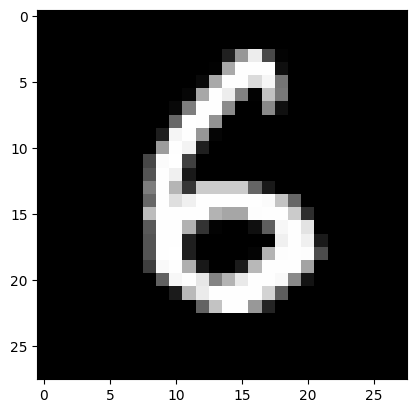

In [77]:
def make_predictions(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    predictions = np.argmax(a2, axis=1)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[index].reshape(1, -1)  #reshape to (1, 784)
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction[0])
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction(106, nn.W1, nn.b1, nn.W2, nn.b2)  # Change index to see different predictions